# Quadratische Funktionen

Der Ausdruck

$$
  f(x) = 2\,x^2 -4\,x + 8
$$

enthält unter anderem den Term $2\,x^2$. Hierdurch unterscheidet sich $f(x)$ von den linearen Funktionen, die bis jetzt betrachtet wurden. Man spricht von einer quadratischen Funktion. Diese soll im Intervall $-3\le x \le 5$ dargestellt werden.

Dazu werden zunächst einige Module importiert.

In [1]:
# die notwendigen Importe

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import numpy as np


# sympy ermöglicht algebraische Berechnungen
# die über pandas und numpy hinausgehen
from sympy import *
init_printing()

# das Modul fun_expr ermöglicht Funktionen
# aus Ausdrücken (expressions) zu generieren
from fun_expr import Function_from_Expression as FE

Um algebraisch rechnen zu können, wird das Symbol `x` definiert. Es ermöglicht die Funktion $f(x)$ darzustellen.

In [2]:
# Definition der Funktionsvariablen
x = Symbol('x')

# Die bekannten Koeffizienten 
# der quadratischen Funktion
a = 2
b = -4
c = 8

# Eine quadratische Funktion generieren
#    x: Die Funktionsvariable
#    a*x**2 + b*x + c: der Ausdruck
#    name='f': Der Name der Funktion
f = FE(x, a*x**2 + b*x + c, name='f')

# Kontrolle: Die Funktionsgleichung von f ausgeben
f.equation()

<IPython.core.display.Math object>

Die Funktion `f` ist ein Objekt vom Typ `FE`, die Kurzform von `fun_expr.Function_from_expression()`

Die Zuweisung erfolgt durch den Befehl

`f = FE(variables, expr, name=None)`

Dabei ist 
- **variables** die Variable (oder das Tuple der Variablen) der Funktion
- **expr** der Funktionsausdruck, <br>
  dieser kann mittels <br>
  `f.expr` <br>
  ausgegeben werden.
- **name** der Name der Funktion. Er kann weggelassen werden. <br>
  Er kann mit `f.name` ausgegeben werden. 
  
  Wurde ein name angegeben, so kann die Methode 
  <br>`f.equation()`<br>
  aufgerufen werden. Sie gibt die Funktionsgleichung der Funktion aus. <br>
  Wurde name nicht angegeben, so 
  kann die Funktionsgleichung z.B. mittels 
  <br>`f.equation(name='f')`<br>
  ausgegeben werden

Die Funktion `f` hat einige Methoden, die bestimmte Aufgaben erleichtern.

Die Methode `f.lambdified()`
wird mit einem `np.array` aufgerufen
und gibt das `array` der Funktionswerte
zurück. 

Das ist sinnvoll, weil `numpy`, `pandas` und `matplotlib` 
mit solchen Arrays arbeiten können.

In [3]:
# z.B. für ein array mit fünf Zahlenwerten
lx = np.linspace(-3,5,5)
f.lambdified(lx)

array([38., 14.,  6., 14., 38.])

Um eine quadratische Funktion zu plotten, reichen fünf Punkte nicht aus. Das liegt daran, dass quadratische Funktionen einen gekrümmten Funktionsverlauf besitzen und bei zu wenig Punkten eckig aussehen. 
Daher wird eine hohe Zahl von Punkten benötigt.

In [4]:
lx = np.linspace(-3,5)

df = pd.DataFrame(
    {
        'x': lx,
        'f': f.lambdified(lx)
    }
)

df.head()

,x,f
0,-3.000000,38.000000
1,-2.836735,35.441066
2,-2.673469,32.988755
3,-2.510204,30.643065
4,-2.346939,28.403998


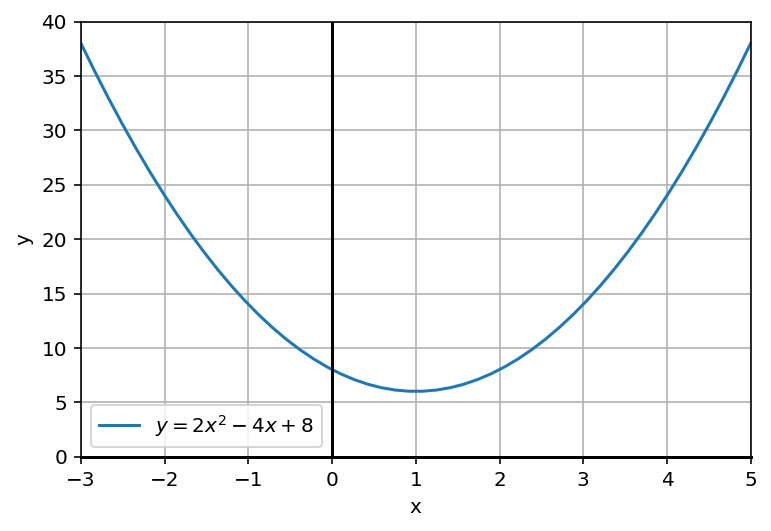

In [5]:
ax = df.plot(
    x='x', 
    y='f', label=f'$y={latex(f.expr)}$', 
    grid=True
)

ax.set(xlabel='x',ylabel='y',ylim=(0,40))
ax.axhline(0,c='k',clip_on=False)
ax.axvline(0,c='k')
plt.show()

## Informationen über den Scheitelpunkt der quadratischen Funktion

Der Graph einer quadratischen Funktion wird auch als Parabel bezeichnet. Sie haben einen *gekrümmten* Verlauf und  besitzen eine charakteristische Form. 

Ist der Koeffizient von $x^2$ positiv, so sind sie nach oben geöffnet und haben sie einen Punkt, an dem der $y$-Wert minimal wird. Diesen Punkt bezeichnet man als Scheitelpunkt. Parabeln sind achsensymmetrisch zu ihrem Scheitelpunkt. 

Der Scheitelpunkt kann durch die Formeln

\begin{align}
  x_s &= -\dfrac{b}{2\,a} \\
  y_s &= f(x_s)
\end{align}

berechnet werden; im Beispiel ist:

In [6]:
x_s = -b/(2*a)
y_s = f(x_s)

(x_s,y_s)

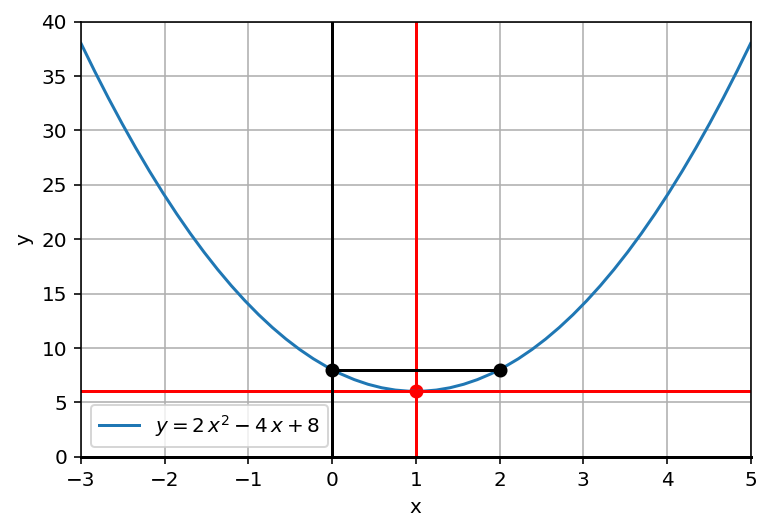

In [7]:
ax = df.plot(x='x', y='f', label='$y=2\,x^2 - 4\,x + 8$', grid=True)

ax.scatter(x_s,y_s,c='r')
ax.axhline(y_s,c='r')
ax.axvline(x_s,c='r')

ax.plot([0,2],[c,c],c='k',marker='o')

ax.set(xlabel='x',ylabel='y',ylim=(0,40))
ax.axhline(0,c='k',clip_on=False)
ax.axvline(0,c='k')
plt.show()

Parabeln sind achsensymmetrisch bezüglich ihres Scheitels $x_s$. Das ermöglicht eine einfache Bestimmung des Scheitelpunktes. Wird die schwarz eingetragene Linie betrachtet, so gilt für die Schnittpunkte dieser Linie mit der Parabel:

\begin{align}
  f(x) &= c \\
  a\,x^2 + b\,x + c &= c \\
  a\,x^2 + b\,x &= 0 \\
  x\cdot(a\,x + b) &= 0
\end{align}

Der **Satz vom Nullprodukt** besagt, dass ein Produkt aus zwei Faktoren nur dann den Wert 0 haben kann, wenn mindestens einer dieser Faktoren den Wert 0 hat. Die letzte Gleichung ist ein Produkt aus den beiden Faktoren
$x$ und $(a\,x+b)$ besteht. Das bedeutet, dass entweder

\begin{align}
  x &= 0 \quad\text{oder} \\
  a\,x + b &= 0
\end{align}

sein muss.

Die beiden schwarz markierten Punkte sind deshalb $x_1=0$ und $x_2=-\frac{b}{a}$. Aufgrund der Symmetrie der Parabel muss der Scheitelpunkt mittig zwischen diesen beiden Punkten liegen, daher ist 

$$
  x_s = \dfrac{x_1+x_2}{2} = 
  \dfrac{0 + \left(-\dfrac{b}{a}\right)}{2} =  
  -\dfrac{b}{2\,a}
$$

Diese Formel ist weiter oben schon benutzt worden. Ist $x_s$ bekannt, so kann der zugehörige Funktionswert durch einsetzen in die Funktion ermittelt werden:

$$
  y_s = f(x_s)
$$

## Aufgabe 1

Die Funktion

$$
  f(x) = 3\,x^2 - 18\,x +7
$$

hat ihren Scheitelpunkt bei $x_s=3$. Der zugehörige $y$-Wert lautet $y_s=-20$. Stellen Sie die Funktion $f$
in einem Diagramm dar. Das Intervall auf der $x$-Achse soll so gewählt werden, dass der Scheitelpunkt mittig liegt. Die Intervallbreite soll insgesamt 10 Einheiten betragen. Hierzu

- Legen Sie das Intervall so fest, dass es eine Breite von 10 Einheiten hat und `x_s` mittig im Intervall liegt.
- Definieren Sie die Funktion $f(x) = \cdots$
- Erstellen Sie das benötigte `np.linspace()`-Objekt und erstellen Sie einen `pd.DataFrame()`.
- Plotten Sie das die Funktion

In [8]:
x = Symbol('x')

a = 3
b = -18
c = 7

f = FE(x, a*x**2 + b*x + c,name='f')
f.equation()

<IPython.core.display.Math object>

In [9]:
x_s = 3
d = 5
lx = np.linspace(x_s-d,x_s+d)

df = pd.DataFrame(
    {
        'x': lx,
        'y': f.lambdified(lx)
    }
)

df.head()

,x,y
0,-2.000000,55.000000
1,-1.795918,49.002499
2,-1.591837,43.254894
3,-1.387755,37.757185
4,-1.183673,32.509371


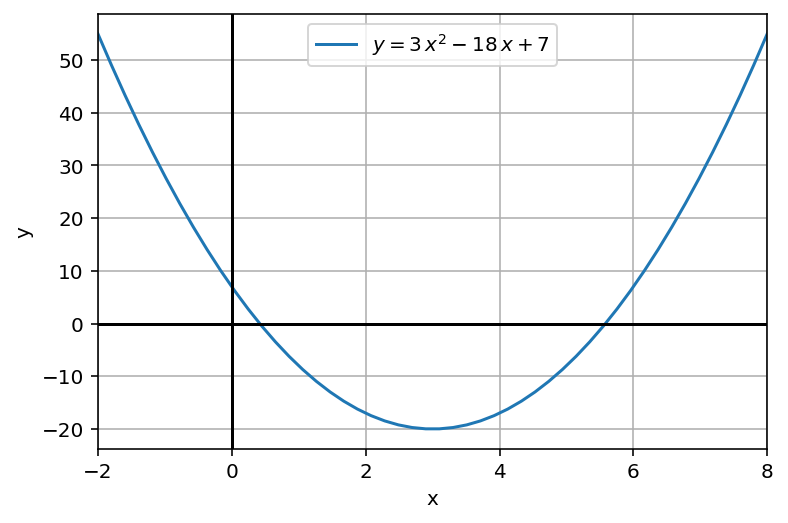

In [11]:
ax = df.plot(x='x',y='y',label=f'$y=3\,x^2  -18\,x + 7$',grid=True)

ax.set(ylabel='y')
ax.axhline(0,c='k')
ax.axvline(0,c='k')

## Aufgabe 2

Die Funktion

$$
  g(x) = 6\,x^2 + 6\,x - 24
$$

ist eine nach unten geöffnete Parabel. Stellen Sie den Graphen $y=g(x)$ in einem Diagramm dar. Das Intervall soll eine Breite von 6 Einheiten haben und der Scheitelpunkt mittig im Intervall liegen.

In [12]:
x = Symbol('x')
a,b,c = 6, 6, -24

g = FE(x, a*x**2 + b*x + c,name='g')
display(g.equation())

x_s = -b/(2*a)
y_s = g(x_s)

(x_s,y_s)

<IPython.core.display.Math object>

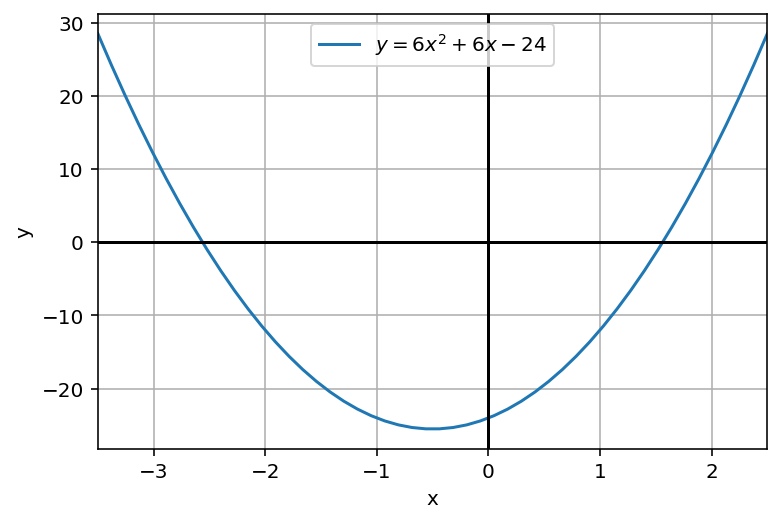

In [14]:
d = 3

lx = np.linspace(x_s-d,x_s+d)

df = pd.DataFrame(
    {
        'x': lx,
        'g': g.lambdified(lx)
    }
)

ax = df.plot(
    x='x',
    y = 'g', label=rf'$y={latex(g.expr)}$',
    grid=True
)

ax.set(xlabel='x',ylabel='y',xlim=(x_s-d,x_s+d))
ax.axhline(0,c='k')
ax.axvline(0,c='k')
plt.show()